## **Waze Project - AB Test: Analyzing The Number of drives Between iPhone and Android Users**

### **Objective:**
The goal of this project was to analyze the difference in the mean number of drives between iPhone and Android users using a two-sample hypothesis test. Understanding the number of rides between different platform users could provide valuable insights into user engagement, app performance, or help improve marketing strategies for different user groups.This project was structured using the PACE methodology.

### **Methodology**
1. **Data Preparation:** Loaded and cleaned dataset using Pandas
2. **Descriptive Statistics:** Calculated mean, median and standard deviation for both groups (iPhone and Android).
3. **Hypothesis Testing:** Performed a two-sample t-test to determine if there was a significant difference between the average of rides for iPhone and Android users.
4. **Significance Level:** Set at α = 0.05


### **1. Research Question(Plan)**
**Research Question:** Does the average number of drives differ between iPhone and Android users?


### **Importing packages and data loading**

##### To begin the analysis, the necessary Python libraries are imported:

    - Pandas for data manipulation and cleaning
    - Numpy for numerical operations and handling arrays
    - Matplotlib for visualizing and plotting
    - Seaborn: For enhanced data visualization
    - Scipy for statistical functions to perform the hypothesis test

In [6]:
# Importing relevant packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:
# Load dataset into dataframe
df = pd.read_csv('waze_dataset.csv')

### **2. Data Exploration (Analyze)**

1. Understanding the data and conducting Exploratory Data Analysis


In [9]:
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [10]:
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


In [11]:
#checking if there are any misspellings
df['device'].unique()

array(['Android', 'iPhone'], dtype=object)

In [12]:
#checking missing data
print('Device column missing data:', df['device'].isnull().sum())
print('Drives column missing data:', df['drives'].isnull().sum())

Device column missing data: 0
Drives column missing data: 0


##### Creating a new variable transforming  device in a new variable (device_type) integer.

    - iPhone: 1
    - Android: 2
This step converts the device type into a numeric form, which is better for statistical analysis and hypothesis testing.

In [14]:
df['device_type'] = df['device'].map({'iPhone' : 1, 'Android': 2})

In [15]:
#mean difference in drives between iPhone and Android users
df.groupby('device_type')['drives'].mean().round(2)

device_type
1    67.86
2    66.23
Name: drives, dtype: float64

**Based on results, it appears that drives who use iPhone have a higher number of drives on average.** 

In [17]:
# other statistics (median)
df.groupby('device_type')['drives'].median().round(2)

device_type
1    48.0
2    47.0
Name: drives, dtype: float64

In [18]:
#other statistics (standard deviation)
df.groupby('device_type')['drives'].std().round(2)

device_type
1    66.81
2    64.24
Name: drives, dtype: float64

#### **Visualizations**
To better understand the distribution of the data, boxplots and histograms were generated.
The boxplot gives us a visual representation of the distribution of the number of drives for each device type. It shows potential outliers and the range of the data. The histogram helps visualize the frequency distribution of the number of drives per device, giving us a sense of how data is spread across the two groups."

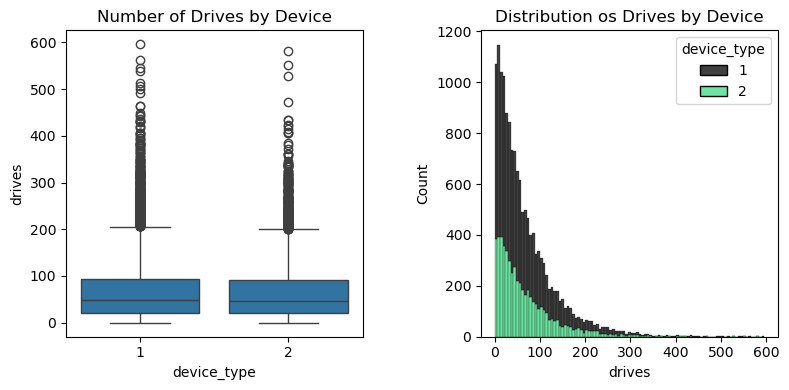

In [20]:
# Set 2 figures 
fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 
palette = {1: 'black', 2: '#3DDC84'}

#Boxplot
sns.boxplot(data=df, x='device_type', y='drives', ax=axes[0])
axes[0].set_title('Number of Drives by Device')

#Histogram - Distribution

sns.histplot(data=df, x='drives', hue='device_type', multiple='stack', palette = palette, ax=axes[1])
axes[1].set_title('Distribution os Drives by Device')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
                   
plt.show()


### **3. Hypothesis testing (Construct)**

A two-sample t-test is appropriate because we are comparing the means of two independent groups (iPhone vs. Android users). The null hypothesis assumes that the means are the same, while the alternative hypothesis suggests that there is a significant difference in the means.

**Hypothesis:**

    - Null hypothesis (H0) --> The number of drives between iPhone and Android are the same
    - Alternative hypothesis (Ha) --> The number of drives between iphone users and android users are different.

**Significance Level (α):** Set to 5%



**Performing the Two-Sample T-Test**

    Two datasets were created to isolate rides for iPhone and Android users. A two-sample t-test was conducted to check for significant differences in the number of rides.(The two groups are independent)

In [23]:
# Isolating the drives columns for iPhone and Android users
iphone_drives = df[df['device_type'] == 1]['drives']
android_drives = df[df['device_type'] == 2]['drives']

In [24]:
# Performing the t-test
ttest, pvalue = stats.ttest_ind(a=iphone_drives, b=android_drives, equal_var=False)

print(f't value: {ttest}')
print(f'p value: {pvalue}')

t value: 1.463523206885235
p value: 0.143351972680206


### **4. Decision and Interpretation (Execute)**


Since the **p-value: 0.14** is greater than the significance level (**α = 0.05**), The test **fail to reject the null hypothesis**.
This indicates that **there is not a statistically significant difference** in the average number of drives between iPhone and Android Users. 

In [27]:
significance_level = 0.05

if pvalue < significance_level:
    print(f' The p-value: {pvalue} reject the null hypothesis, there is a statistical difference in drives per device')
else:
    print(f'The p-value: {pvalue:.2f} fail to reject the null hypothesis, there is NO  statistical difference in drives per device. Probably it happened by chance')


The p-value: 0.14 fail to reject the null hypothesis, there is NO  statistical difference in drives per device. Probably it happened by chance


### **Business Insights**

 **Key Insight:**  
 The analysis revealed no significant difference in the number of drives between Android and iPhone  users, suggesting that the user experience between the two platforms may not differ substantially.

 **Next Steps:** Explore what other factors influence the variation in the number of drives and run additional hypothesis tests to learn more about user behavior.

### **Final Thoughts**
This project helped me understand the significance of statistical testing, the application of hypothesis testing in real-world scenarios, and how to use Python libraries for analysis. It's an excellent foundation for further exploration into user behavior and app performance

This analysis serves as a solid foundation for future explorations into user behavior and app performance across different platforms.